# Features Tradicionais (Machine Learning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import scipy
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("tab10")

# Parâmetros
data_directory = 'drive/My Drive/Datasets/MFPT Fault Data Sets'
verbose = True 

# Nome dos arquivos da base de dados:
data_folders = {'1 - Three Baseline Conditions': 'B',
                '2 - Three Outer Race Fault Conditions': 'ORF',
                '3 - Seven More Outer Race Fault Conditions': 'VORF',
                '4 - Seven Inner Race Fault Conditions': 'VIRF'}

# Dicicionário auxiliar:
data_dict = {}

# Carregando os dados, iterando com o processo:
for data_folder in data_folders.keys():
    for f in os.listdir(os.path.join(data_directory, data_folder)):
        if ".mat" in f:
            # Path
            file_path = os.path.join(data_directory, data_folder, f)
            # Carregando os dados .mat
            mat = sio.loadmat(file_path)
            # Remove a extensão .mat do nome
            name = f.strip('.mat')
            # Consegue os sinais de dados
            raw_signal = mat['bearing']['gs'][0][0].flatten()
            # Consegue a velocidade rotacional do rolamento:
            shaft_rate = float(mat['bearing']['rate'][0][0][0])
            # Consegue a carga utilizada:
            load = float(mat['bearing']['load'][0][0][0])
            # Consegue a frequência de amostragem:
            sampling_rate = float(mat['bearing']['sr'][0][0][0])
            # Constrói os dicionários:
            data_dict[name] = {'raw_signal': raw_signal, 'shaft_rate': shaft_rate,'load': load,'sampling_rate': sampling_rate}
            if verbose:
                print('\n----------------------------------')
                print(name.upper(), '\n----------------------------------')
                print('-> shape: {}'.format(raw_signal.shape))
                print('-> shaft_rate: {}'.format(shaft_rate))
                print('-> load: {}'.format(load))
                print('-> sampling_rate: {}'.format(sampling_rate))
                print('-> full path: {}'.format(file_path))

data_df = pd.DataFrame(data=data_dict).transpose()
data_df

#Funções Auxiliares:

def average(L):
    return [np.mean(aux) for aux in L]
def variance(L):
    return [np.var(aux) for aux in L]
def max_amplitude(L):
    return [np.amax(aux) for aux in L]
def rms(L):
    # root mean square
    return [np.sqrt(np.mean(aux**2)) for aux in L]
def peak_to_peak(L):
    #diferença do mínimo pro máximo:
    return [np.amax(aux) - np.amin(aux) for aux in L]
def split_signal(x, L, overlap):
    splitted = [x[i: i + L] for i in range(0, len(x), L - overlap)
                if i + L <= len(x)]
    return splitted

#Construindo Features:

# Parâmetros
L = 512
overlap = 0 
features_funcs = {'average': average,
                  'variance': variance,
                  'max_amplitude': max_amplitude,
                  'rms': rms,
                  'peak_to_peak': peak_to_peak}

df_list = []
for cat, att in data_dict.items():
    #extrai os sinais:
    raw_signal = att['raw_signal']
    # Realiza o split dos dados:
    splitted_raw_signal = split_signal(raw_signal, L, overlap)
    # Geração de features para cada categoria:
    features_dict = {}
    for name, fn in features_funcs.items():
        features_dict[name] = fn(splitted_raw_signal)
    # Transforma para dataset
    df = pd.DataFrame(data=features_dict)
    # Adiciona a coluna com as categorias:
    df['category'] = cat
    df_list.append(df)

mfpt_features = pd.concat(df_list).reset_index(drop=True)
mfpt_features

#Numerando as Features:

#Mudando os nomes das cartegorias:
mfpt_features['category'] = mfpt_features['category'].replace({'baseline_1': 0,
                                                                'baseline_2': 0,
                                                                'baseline_3': 0,
                                                                'OuterRaceFault_1': 1,
                                                                'OuterRaceFault_2': 1,
                                                                'OuterRaceFault_3': 1,
                                                                'OuterRaceFault_vload_1': 1,
                                                                'OuterRaceFault_vload_2': 1,
                                                                'OuterRaceFault_vload_3': 1,
                                                                'OuterRaceFault_vload_4': 1,
                                                                'OuterRaceFault_vload_5': 1,
                                                                'OuterRaceFault_vload_6': 1,
                                                                'OuterRaceFault_vload_7': 1,
                                                                'InnerRaceFault_vload_1': 2,
                                                                'InnerRaceFault_vload_2': 2,
                                                                'InnerRaceFault_vload_3': 2,
                                                                'InnerRaceFault_vload_4': 2,
                                                                'InnerRaceFault_vload_5': 2,
                                                                'InnerRaceFault_vload_6': 2,
                                                                'InnerRaceFault_vload_7': 2})



----------------------------------
BASELINE_2 
----------------------------------
-> shape: (585936,)
-> shaft_rate: 25.0
-> load: 270.0
-> sampling_rate: 97656.0
-> full path: drive/My Drive/Datasets/MFPT Fault Data Sets/1 - Three Baseline Conditions/baseline_2.mat

----------------------------------
BASELINE_3 
----------------------------------
-> shape: (585936,)
-> shaft_rate: 25.0
-> load: 270.0
-> sampling_rate: 97656.0
-> full path: drive/My Drive/Datasets/MFPT Fault Data Sets/1 - Three Baseline Conditions/baseline_3.mat

----------------------------------
BASELINE_1 
----------------------------------
-> shape: (585936,)
-> shaft_rate: 25.0
-> load: 270.0
-> sampling_rate: 97656.0
-> full path: drive/My Drive/Datasets/MFPT Fault Data Sets/1 - Three Baseline Conditions/baseline_1.mat

----------------------------------
OUTERRACEFAULT_1 
----------------------------------
-> shape: (585936,)
-> shaft_rate: 25.0
-> load: 270.0
-> sampling_rate: 97656.0
-> full path: drive/My Dri

In [ ]:
#Base de dados que contem as features: average, variance, max_amplitude, rms, peak_to_peak e as categorias: [1,2,3]
mfpt_features

,average,variance,max_amplitude,rms,peak_to_peak,category
0,-0.069958,0.736731,2.760705,0.861176,5.721649,0
1,-0.134192,0.756117,2.312626,0.879843,5.039613,0
2,-0.109054,0.865251,2.475260,0.936560,5.238192,0
3,-0.082351,0.637332,2.456825,0.802567,4.825000,0
4,-0.132110,0.811191,2.346098,0.910299,5.490275,0
...,...,...,...,...,...,...
10863,-0.197145,0.948817,4.078002,0.993822,7.649424,2
10864,-0.217298,0.516480,2.701354,0.750799,5.545836,2
10865,-0.186529,1.039268,3.864078,1.036369,8.055035,2
10866,-0.151504,13.984358,19.836850,3.742634,39.299030,2


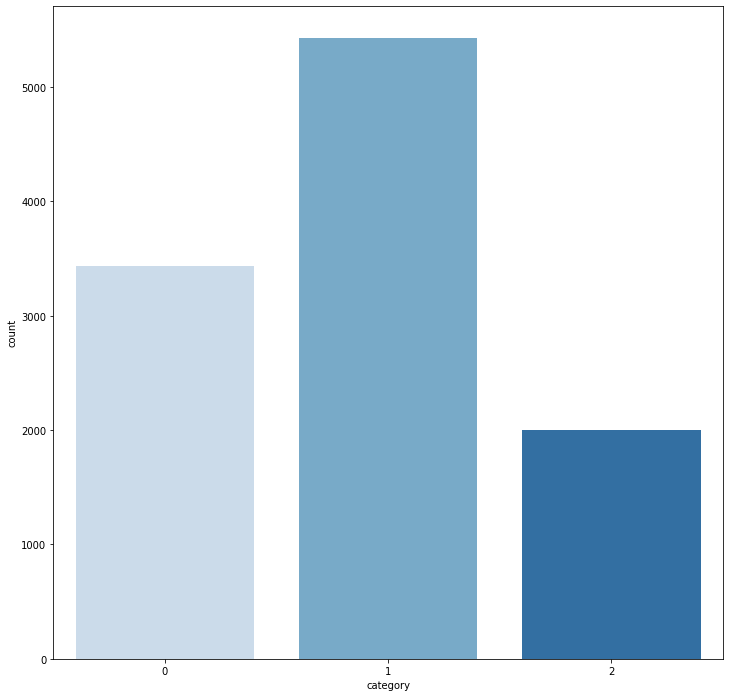

In [ ]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots(figsize=(12,12))
sns.countplot(x='category', data=mfpt_features, palette = 'Blues')

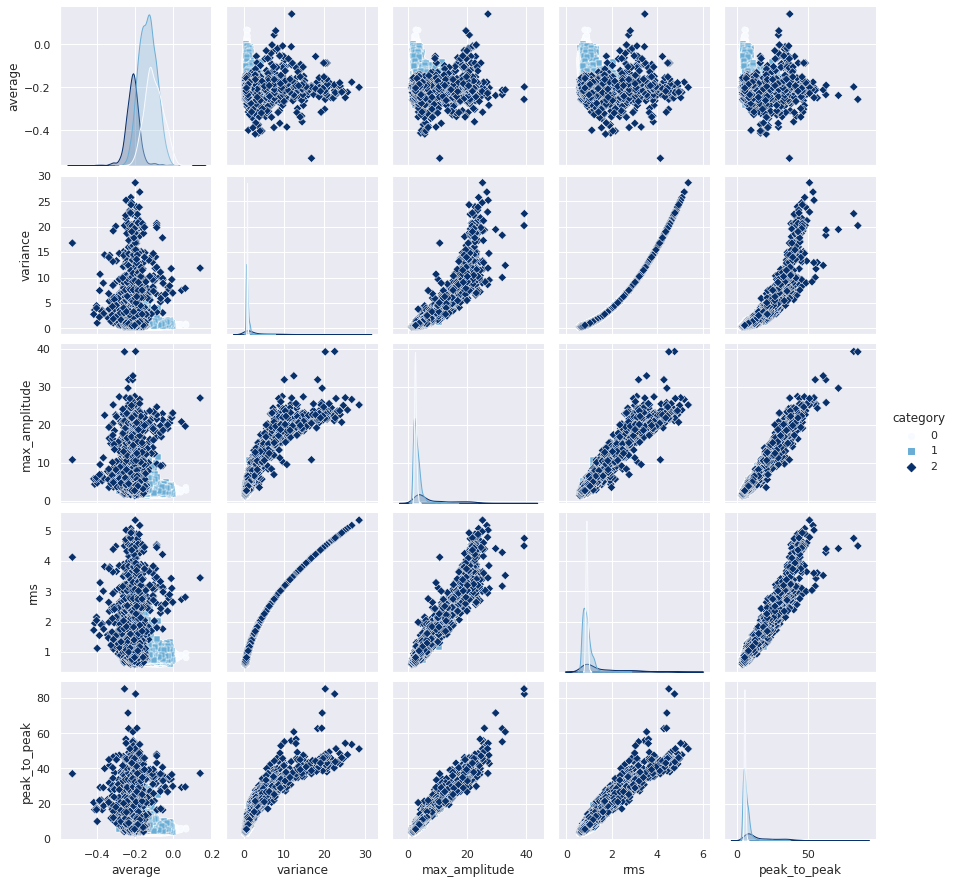

In [ ]:
sns.set_theme()
sns.pairplot(mfpt_features, hue="category", markers=["o", "s", "D"], palette = 'Blues')

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import setup,compare_models, predict_model

setup(data = mfpt_features, target = 'category',data_split_stratify = True, train_size = 0.70)

ImportError: ignored

In [ ]:

best = compare_models()

In [ ]:
predict_model(best)

STFT
-----------------

In [ ]:
from sklearn.preprocessing import StandardScaler

#Carregando os dados:

x_baseline = mfpt_features[mfpt_features['category'] == 0].drop('category', axis = 1)
x_outer = mfpt_features[mfpt_features['category'] == 1].drop('category', axis = 1)
x_inner = mfpt_features[mfpt_features['category'] == 2].drop('category', axis = 1)

#Normalizando a base de dados
scaler = StandardScaler()

scaler.fit(x_baseline)
xb_norm = scaler.transform(x_baseline)

scaler.fit(x_outer)
xo_norm = scaler.transform(x_outer)

scaler.fit(x_inner)
xi_norm = scaler.transform(x_inner)

#Definindo chunks:
tam = 512
n_b = int(len(x_baseline) / tam)
n_o = int(len(x_outer) / tam)
n_i = int(len(x_inner) / tam)

x_b = np.ndarray(shape = (n_b, tam, 1), dtype = 'float32')
x_o = np.ndarray(shape = (n_o, tam, 1), dtype = 'float32')
x_i = np.ndarray(shape = (n_i, tam, 1), dtype = 'float32')

columns = []
for i in range(tam):
    columns.append("{}".format(i))

for i in range(n_b):
    tami = tam * i
    x_b[i] = xb_norm[tami : tami + tam]
    
for j in range(n_o):
    tamj = tam * j
    x_o[j] = xo_norm[tamj : tamj + tam]

for k in range(n_i):
    tamk = tam * k
    x_i[k] = xi_norm[tamk : tamk + tam]  

x_b = x_b.reshape(n_b, tamanho)
y_b = np.zeros(n_b).astype('int32')

x_o = x_o.reshape(n_o, tamanho)
y_o = np.ones(n_o).astype('int32')

x_i = x_i.reshape(n_i, tamanho)
y_i = 2 * np.ones(n_i).astype('int32')

In [ ]:
#Função para Criar as imagens:

from skimage.transform import resize
from scipy import signal
from scipy.signal import spectrogram

def create_stft_images(X, fs, rescale_size):
    n_samples = X.shape[0]
    n_channels = 3

    X_STFT = np.ndarray(shape = (n_samples, rescale_size, rescale_size, n_channels), dtype = 'float32')
    
    for sample in range(n_samples):
      if sample % 500 == 0:
        print(sample)
      
      series = X[sample, :]
      f, t, Sxx = spectrogram(series, fs)
      rescale_sxx = resize(Sxx, (rescale_size, rescale_size, n_channels), mode = 'edge')
      rescale_sxx /= np.max(rescale_sxx)
      X_STFT[sample, :, :] = rescale_sxx
    
    return X_STFT

In [ ]:
fs1, fs2 = 97656, 48828
tam_fig = 96

xb_stft = create_stft_images(x_b, fs1, tam_fig)
xo_stft = create_stft_images(x_o, fs2, tam_fig)
xi_stft = create_stft_images(x_i, fs2, tam_fig)

In [ ]:
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

fig, (plt1, plt2) = plt.subplots(1, 2, sharey = True, figsize=(10,4), constrained_layout=True)

plt1.set_xlabel("Time $(sec)$")
plt1.set_ylabel("Frequency $(Hz)$")
plt1.set_title('Outer Race fault (Fixed & Variable Load)')
f1, t1, Sxx1 = spectrogram(x_o[1,:], fs2)
plt1.pcolormesh(t1, f1, Sxx1, shading='flat')

plt2.set_xlabel("Time $(sec)$")
plt2.set_ylabel("Frequency $(Hz)$")
plt2.set_title('Inner Race fault (7 Conditions & Variable Load)')
f2, t2, Sxx2 = spectrogram(x_i[1,:], fs2)
plt2.pcolormesh(t2, f2, Sxx2, shading='flat')

fig.suptitle('Spectrograms - STFT')
fig.show()

In [ ]:
fig, plt0 = plt.subplots(1, 1, sharey = True, figsize=(5,4), constrained_layout=True)

plt0.set_xlabel("Time $(sec)$")
plt0.set_ylabel("Frequency $(Hz)$")
plt0.set_title('Spectrogram Nominal state (No Fault)')
f0, t0, Sxx0 = spectrogram(x_b[1,:], fs1)
plt0.pcolormesh(t0, f0, Sxx0, shading='flat')
fig.show()

In [ ]:


from sklearn.model_selection import train_test_split

x_imgs = np.concatenate((xb_stft, xo_stft, xi_stft))
labels = np.concatenate((y_b, y_o, y_i))

x_train, x_test, y_train, y_test = train_test_split(x_imgs, labels, test_size = 0.3, random_state = 8)
tam = x_train.shape[1]


In [ ]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

In [ ]:
xi_stft.shape

In [ ]:
import matplotlib.pyplot as plt

def plot_imgs(n_plot):
  f, ax = plt.subplots(n_plot, n_plot)
  f.set_size_inches(10, 10)
  for i in range(n_plot):
    for j in range(n_plot):
      idx = np.random.randint(0, xb_stft.shape[0])
      ax[i, j].imshow(xb_stft[idx])
      ax[i, j].get_xaxis().set_visible(False)
      ax[i, j].get_yaxis().set_visible(False)
      f.subplots_adjust(hspace = 0.1)
      f.subplots_adjust(wspace = 0.0)
  
  plt.show()
#
plot_imgs(2)

In [ ]:
#Construindo o modelo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

print("tensor flow version: ", tf.__version__)

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

num_classes = 3

model = Sequential()
#Extraction Feature Step
model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same',  
                 input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3),activation = 'relu', padding='same'))
model.add(Conv2D(64, (3, 3),activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3),activation = 'relu', padding='same'))
model.add(Conv2D(128, (3, 3),activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Classification Problem
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu')) 
model.add(Dropout(0.2)) #Dropout, camada anterior
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2)) # Dropout
model.add(Dense(num_classes, activation='softmax')) #Camada de output: Notar ativação e tamanho


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()

In [ ]:
x_train

In [ ]:
batch_size = 256
epochs = 10

class_train = keras.utils.to_categorical(y_train, num_classes)
class_test = keras.utils.to_categorical(y_test, num_classes)

history = model.fit(x_train, class_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, class_test))

In [ ]:
#Gráfico Acurácia e Loss

import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

-----------

# WT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_baseline)
xb_norm = scaler.transform(x_baseline)
scaler.fit(x_outer)
xo_norm = scaler.transform(x_outer)
scaler.fit(x_inner)
xi_norm = scaler.transform(x_inner)


tam = 512
n_b = int(len(x_baseline) / tam)
n_o = int(len(x_outer) / tam)
n_i = int(len(x_inner) / tam)

x_b = np.ndarray(shape = (n_b, tam, 1), dtype = 'float32')
x_o = np.ndarray(shape = (n_o, tam, 1), dtype = 'float32')
x_i = np.ndarray(shape = (n_i, tam, 1), dtype = 'float32')

columns = []
for i in range(tam):
    columns.append("{}".format(i))

for i in range(n_b):
    tami = tam * i
    x_b[i] = xb_norm[tami : tami + tam]
    
for j in range(n_o):
    tamj = tam * j
    x_o[j] = xo_norm[tamj : tamj + tam]

for k in range(n_i):
    tamk = tam * k
    x_i[k] = xi_norm[tamk : tamk + tam]  

df_aux_b = pd.DataFrame(x_b.reshape(n_b, tam), columns = columns)
df_aux_b['classe'] = 0
df_aux_o = pd.DataFrame(x_o.reshape(n_o, tam), columns = columns)
df_aux_o['classe'] = 1
df_aux_i = pd.DataFrame(x_i.reshape(n_i, tam), columns = columns)
df_aux_i['classe'] = 2

df_dados = pd.concat([df_aux_b, df_aux_o, df_aux_i], ignore_index = True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_dados.drop('classe', axis = 1), df_dados['classe'], 
                                                    test_size = 0.3, random_state = 101)

X_train = pd.DataFrame.to_numpy(X_train)
X_test = pd.DataFrame.to_numpy(X_test)

y_train = pd.DataFrame.to_numpy(y_train)
y_test = pd.DataFrame.to_numpy(y_test)

In [ ]:
import pywt
from skimage.transform import resize
def create_cwt_images(X, n_scales, rescale_size, wavelet_name = "morl"):
    n_samples = X.shape[0] 
    n_channels = 3 
    
    # range of scales from 1 to n_scales
    scales = np.arange(1, n_scales + 1) 
    
    # pre allocate array
    X_cwt = np.ndarray(shape = (n_samples, rescale_size, rescale_size, n_channels), dtype = 'float32')
    
    for sample in range(n_samples):
        if sample % 500 == 0:
            print(sample)
            
        serie = X[sample, :]
        # continuous wavelet transform 
        coeffs, freqs = pywt.cwt(serie, scales, wavelet_name)
        # resize the 2D cwt coeffs
        rescale_coeffs = resize(coeffs, (rescale_size, rescale_size, n_channels), mode = 'constant')
        X_cwt[sample,:,:] = rescale_coeffs
            
    return X_cwt

In [ ]:
df_dados[df_dados['classe'] == 0].drop()

In [ ]:
# amount of pixels in X and Y 
rescale_size = 96
# determine the max scale size
n_scales = 96

xb_cwt = create_cwt_images(x_b, n_scales, rescale_size)
xo_cwt = create_cwt_images(x_o, n_scales, rescale_size)
xi_cwt = create_cwt_images(x_i, n_scales, rescale_size)

In [ ]:
f, ax = plt.subplots()

idx = np.random.randint(0, xb_cwt.shape[0]) # escolhe uma figura aleatoria dentre todas
print("idx: ", idx)
ax.imshow(xb_cwt[idx], interpolation = 'bilinear', cmap='plasma')
plt.show

In [ ]:
xbb = xb_cwt
xoo = xo_cwt
xii = xi_cwt

In [ ]:
xbb

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xbb)

In [ ]:
xb_cwt[0]

In [ ]:
import matplotlib.pyplot as plt

def plot_imgs(n_plot):
  f, ax = plt.subplots(n_plot, n_plot)
  f.set_size_inches(10, 10)
  for i in range(n_plot):
    for j in range(n_plot):
      idx = np.random.randint(0, xb_cwt.shape[0])
      ax[i, j].imshow(xb_cwt[idx])
      ax[i, j].get_xaxis().set_visible(False)
      ax[i, j].get_yaxis().set_visible(False)
      f.subplots_adjust(hspace = 0.1)
      f.subplots_adjust(wspace = 0.0)
  
  plt.show()
#
plot_imgs(2)

In [ ]:
import matplotlib.pyplot as plt

def plot_imgs(n_plot):
  f, ax = plt.subplots(n_plot, n_plot)
  f.set_size_inches(10, 10)
  for i in range(n_plot):
    for j in range(n_plot):
      idx = np.random.randint(0, xo_cwt.shape[0])
      ax[i, j].imshow(xo_cwt[idx])
      ax[i, j].get_xaxis().set_visible(False)
      ax[i, j].get_yaxis().set_visible(False)
      f.subplots_adjust(hspace = 0.1)
      f.subplots_adjust(wspace = 0.0)
  
  plt.show()
#
plot_imgs(2)

In [ ]:
import matplotlib.pyplot as plt

def plot_imgs(n_plot):
  f, ax = plt.subplots(n_plot, n_plot)
  f.set_size_inches(10, 10)
  for i in range(n_plot):
    for j in range(n_plot):
      idx = np.random.randint(0, xi_cwt.shape[3])
      ax[i, j].imshow(xi_cwt[idx], cmap ='plasma')
      ax[i, j].get_xaxis().set_visible(False)
      ax[i, j].get_yaxis().set_visible(False)
      f.subplots_adjust(hspace = 0.1)
      f.subplots_adjust(wspace = 0.0)
  
  plt.show()
#
plot_imgs(2)

In [ ]:
from sklearn.model_selection import train_test_split

x_imgs = np.concatenate((xb_cwt, xo_cwt, xi_cwt))
labels = np.concatenate((y_b, y_o, y_i))

x_train, x_test, y_train, y_test = train_test_split(x_imgs, labels, test_size = 0.3, random_state = 8)
tam = x_train.shape[1]

In [ ]:
# Construindo o modelo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

print("tensor flow version: ", tf.__version__)

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

num_classes = 3

model = Sequential()
#Extraction Feature Step
model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same',  
                 input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3),activation = 'relu', padding='same'))
model.add(Conv2D(64, (3, 3),activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3),activation = 'relu', padding='same'))
model.add(Conv2D(128, (3, 3),activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu')) 
model.add(Dropout(0.2)) #Dropout, camada anterior
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2)) # Dropout
model.add(Dense(num_classes, activation='softmax')) #Camada de output: Notar ativaÃ§Ã£o e tamanho


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()


In [ ]:
batch_size = 256
epochs = 10

class_train = keras.utils.to_categorical(y_train, num_classes)
class_test = keras.utils.to_categorical(y_test, num_classes)

history = model.fit(x_train, class_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, class_test))

In [ ]:
score = model.evaluate(x_test, class_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
previsao = model.predict(x_test)
cm = confusion_matrix(class_test.argmax(1), previsao.argmax(1))
print(cm)

In [ ]:
#%% plotar imaagens

f, ax = plt.subplots()

idx = np.random.randint(0, x_train.shape[0]) # escolhe uma figura aleatoria dentre todas
print("idx: ", idx)
ax.imshow(x_train[idx], interpolation = 'bilinear', cmap = 'Purples')
plt.show

#%%

In [ ]:
xbb = xb_cwt
xoo = xo_cwt
xii = xi_cwt

In [ ]:
xii.shape

In [ ]:
xbb.shape = (3433,96*96,3)
xoo.shape= (5435,96*96,3)
xii.shape = (2002, 96*96, 3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

for i in range(1,3):
    scaler.fit(xbb)
    scaler.fit(xbb)
    scaler.fit(xbb)
    scaler.fit(xbb)



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xbb)